In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Updated_Taxi_Trip_pricing.xlsx')

In [3]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.008520,2.453000,3.503840,1.232650,0.292770,62.105210,56.541560
std,19.402661,1.079331,0.848115,0.418932,0.112664,31.339464,39.492129
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [4]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1,High,Clear,3.52,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4,Medium,Clear,3.12,0.61,0.29,61.96,62.1295
997,7.70,Morning,Weekday,3,Low,Rain,2.08,1.78,0.29,54.18,33.1236
998,47.56,Morning,Weekday,1,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
time_encoder = OrdinalEncoder(categories=[['Morning', 'Afternoon', 'Evening', 'Night']])
df['Time_of_Day_Encoded'] = time_encoder.fit_transform(df[['Time_of_Day']])

df['Day_of_Week_Encoded'] = df['Day_of_Week'].map({'Weekday': 0, 'Weekend': 1})

traffic_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Traffic_Conditions_Encoded'] = traffic_encoder.fit_transform(df[['Traffic_Conditions']])

weather_encoder = OrdinalEncoder(categories=[['Clear', 'Rain', 'Snow']])
df['Weather_Encoded'] = weather_encoder.fit_transform(df[['Weather']])


In [7]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Encoded,Day_of_Week_Encoded,Traffic_Conditions_Encoded,Weather_Encoded
0,19.35,Morning,Weekday,3,Low,Clear,3.56,0.80,0.32,53.82,36.2624,0.0,0,0.0,0.0
1,47.59,Afternoon,Weekday,1,High,Clear,3.52,0.62,0.43,40.57,50.0745,1.0,0,2.0,0.0
2,36.87,Evening,Weekend,1,High,Clear,2.70,1.21,0.15,37.27,52.9032,2.0,1,2.0,0.0
3,30.33,Evening,Weekday,4,Low,Clear,3.48,0.51,0.15,116.81,36.4698,2.0,0,0.0,0.0
4,25.83,Evening,Weekday,3,High,Clear,2.93,0.63,0.32,22.64,15.6180,2.0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,1.0,1,1.0,0.0
996,45.95,Night,Weekday,4,Medium,Clear,3.12,0.61,0.29,61.96,62.1295,3.0,0,1.0,0.0
997,7.70,Morning,Weekday,3,Low,Rain,2.08,1.78,0.29,54.18,33.1236,0.0,0,0.0,1.0
998,47.56,Morning,Weekday,1,Low,Clear,2.67,0.82,0.17,114.94,61.2090,0.0,0,0.0,0.0


In [8]:
df[['Trip_Distance_km', 'Passenger_Count', 'Base_Fare','Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
    'Time_of_Day_Encoded','Day_of_Week_Encoded','Traffic_Conditions_Encoded','Weather_Encoded', 'Trip_Price']].corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Encoded,Day_of_Week_Encoded,Traffic_Conditions_Encoded,Weather_Encoded,Trip_Price
Trip_Distance_km,1.000000,-0.045072,0.031812,-0.015398,-0.025494,-0.020963,0.024951,-0.021809,0.094591,0.017417,0.830479
Passenger_Count,-0.045072,1.000000,0.019717,0.025258,0.028360,0.024868,0.009048,0.021068,-0.003664,0.013484,-0.012468
Base_Fare,0.031812,0.019717,1.000000,0.002975,-0.018047,0.011585,0.041066,-0.032782,0.027787,-0.032033,0.033103
Per_Km_Rate,-0.015398,0.025258,0.002975,1.000000,0.027585,0.025636,0.035502,-0.040856,-0.057022,0.042974,0.256122
Per_Minute_Rate,-0.025494,0.028360,-0.018047,0.027585,1.000000,-0.022913,0.060570,0.000250,-0.027870,-0.021278,0.131534
Trip_Duration_Minutes,-0.020963,0.024868,0.011585,0.025636,-0.022913,1.000000,-0.061738,0.001451,-0.003813,0.017063,0.214669
Time_of_Day_Encoded,0.024951,0.009048,0.041066,0.035502,0.060570,-0.061738,1.000000,0.044632,0.059736,0.039489,0.003127
Day_of_Week_Encoded,-0.021809,0.021068,-0.032782,-0.040856,0.000250,0.001451,0.044632,1.000000,-0.011220,0.026458,-0.028516
Traffic_Conditions_Encoded,0.094591,-0.003664,0.027787,-0.057022,-0.027870,-0.003813,0.059736,-0.011220,1.000000,-0.016534,0.067425
Weather_Encoded,0.017417,0.013484,-0.032033,0.042974,-0.021278,0.017063,0.039489,0.026458,-0.016534,1.000000,0.032919


I select `Trip_Distance_km`, `Per_Km_Rate`, and `Trip_Duration_Minutes` for multiple regression because they show the highest correlation with `Trip_Price`, making them strong predictors, while other variables have negligible or weak correlations, adding little value to the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [11]:
X = df[['Trip_Distance_km','Per_Km_Rate','Trip_Duration_Minutes']]
y = df['Trip_Price']

To prevent bias in the regression model due to the high magnitude of Trip_Distance_km, I apply standardization.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes']] = scaler.fit_transform(X[['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes']])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test,y_pred)

In [19]:
mse

199.57381261698845

In [20]:
np.sqrt(mse)

14.127059588498536

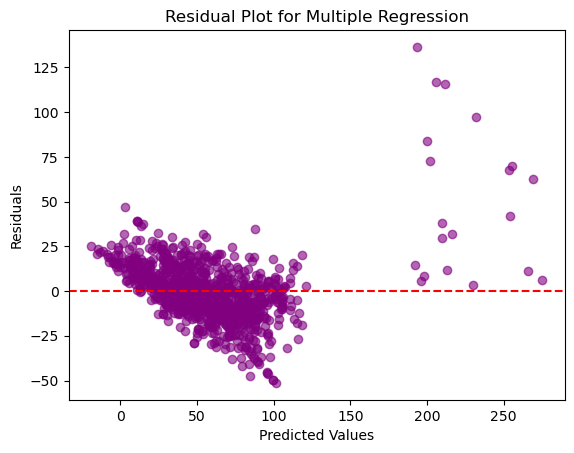

In [21]:
residuals = y - model.predict(X)

# Scatterplot of residuals
plt.scatter(model.predict(X), residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line for zero residuals
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Regression")
plt.show()

In [22]:
r2 = r2_score(y_test, y_pred)  # Use actual & predicted values
print("R² Score:", r2)

R² Score: 0.8018606374420334


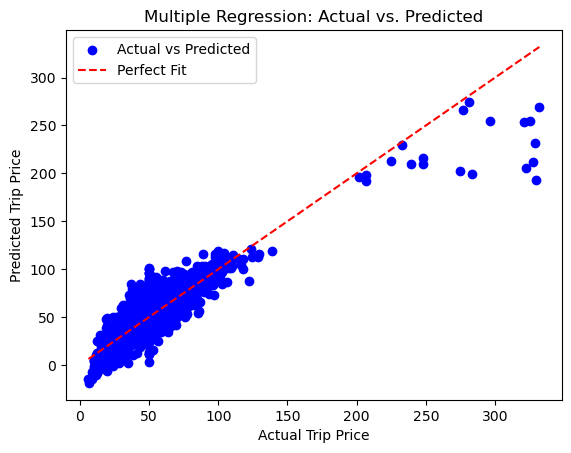

In [23]:
y_predict=model.predict(X)
plt.scatter(y, y_predict, color='blue', label='Actual vs Predicted')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label='Perfect Fit')

plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Multiple Regression: Actual vs. Predicted')
plt.legend()
plt.show()